In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BrentOilPrices.csv',parse_dates=True)

In [3]:
df.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date':'ds','Price':'y'},inplace=True)
df.sample(10)

,ds,y
1447,1993-01-14,17.00
3913,2002-10-17,28.22
955,1991-02-13,21.00
6566,2013-04-09,104.08
1631,1993-10-07,16.88
7352,2016-05-12,46.43
2508,1997-03-28,18.53
6617,2013-06-20,102.72
5500,2009-01-05,45.84
5107,2007-06-13,69.24


In [5]:
df.shape

(8360, 2)

In [6]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
8715,2021-04-12,39.645068,23.238954,54.297147
8716,2021-04-13,39.573343,22.642715,53.821545
8717,2021-04-14,39.651546,23.524151,55.493133
8718,2021-04-15,39.861602,23.533776,55.523266
8719,2021-04-16,39.829975,23.757780,54.267349
8720,2021-04-17,41.117127,25.023614,56.922296
8721,2021-04-18,41.167812,24.696113,56.699244
8722,2021-04-19,40.025502,24.600385,55.986414
8723,2021-04-20,39.940505,24.443149,56.300962
8724,2021-04-21,40.004001,23.160287,55.005605


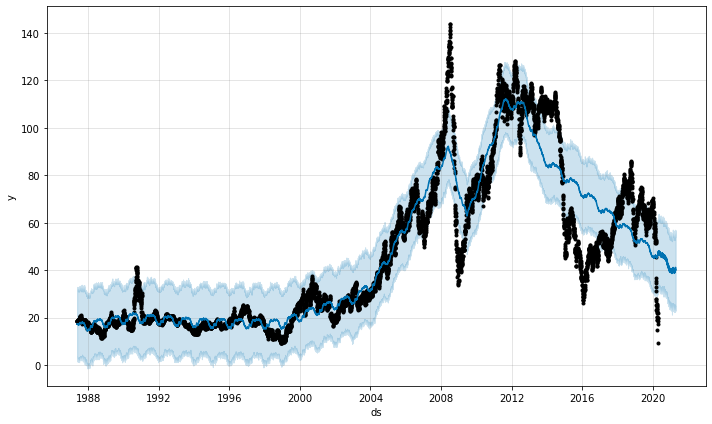

In [8]:
plot = model.plot(forecast);

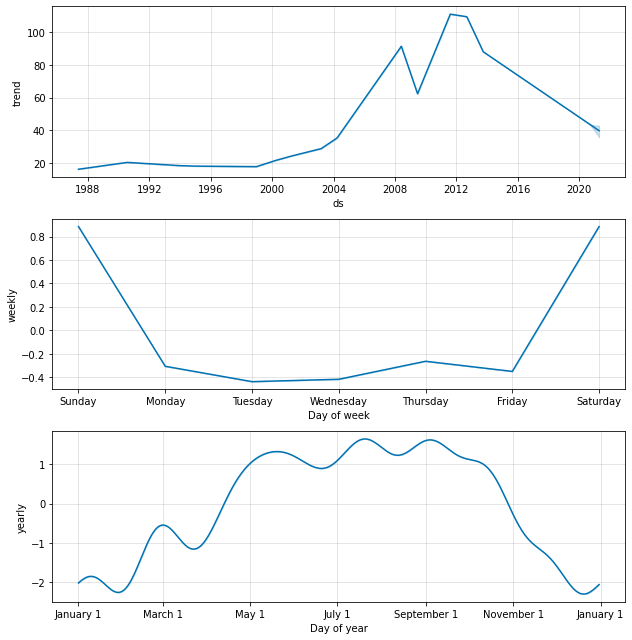

In [9]:
model.plot_components(forecast);

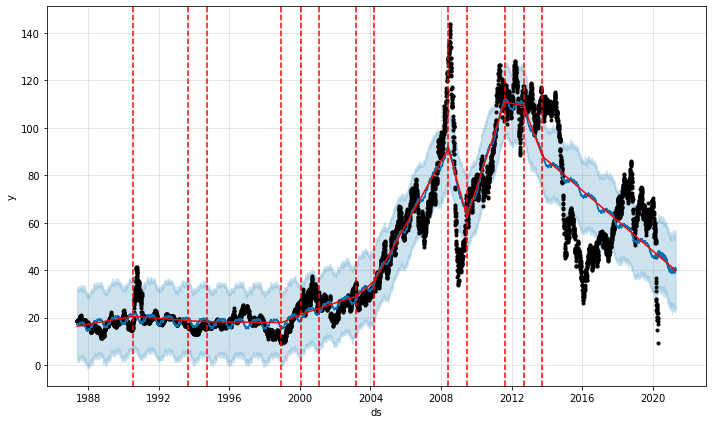

In [10]:
plot = model.plot(forecast)
a= add_changepoints_to_plot(plot.gca(),model,forecast)